In [1]:
import pandas as pd
import numpy as np
import os as os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn_pandas import DataFrameMapper
from sklearn import metrics
from sklearn.metrics import mean_squared_error


from xgboost import XGBRegressor




from google.colab import files

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train = pd.read_csv('/content/drive/MyDrive/Data_Science/train_data.csv')

In [4]:
train.head()

,year,month,day,city,medicine,sales
0,2015,1,2,1,1,24.0
1,2015,1,2,1,2,144.0
2,2015,1,2,1,3,84.0
3,2015,1,2,1,4,24.0
4,2015,1,2,1,5,8.0


In [5]:
train.describe()

,year,month,day,city,medicine,sales
count,2.262434e+07,2.262434e+07,2.262434e+07,2.262434e+07,2.262434e+07,2.262434e+07
mean,2.016510e+03,6.220520e+00,1.572557e+01,5.488639e+00,1.169635e+03,5.166032e+01
std,1.023379e+00,3.449989e+00,8.789664e+00,2.849396e+00,8.016848e+02,1.100297e+02
min,2.015000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.948000e+03
25%,2.016000e+03,3.000000e+00,8.000000e+00,3.000000e+00,5.110000e+02,1.200000e+01
50%,2.017000e+03,6.000000e+00,1.600000e+01,5.000000e+00,1.034000e+03,2.800000e+01
75%,2.017000e+03,9.000000e+00,2.300000e+01,8.000000e+00,1.718000e+03,5.600000e+01
max,2.018000e+03,1.200000e+01,3.100000e+01,1.000000e+01,3.389000e+03,8.299200e+04


In [6]:
train.nunique()

year             4
month           12
day             31
city            10
medicine      3389
sales       175574
dtype: int64

In [7]:
from datetime import datetime
train['dateInt']=train['year'].astype(str) + train['month'].astype(str).str.zfill(2)+ train['day'].astype(str).str.zfill(2)
train['date'] = pd.to_datetime(train['dateInt'], format='%Y%m%d')

In [8]:
train.head()

,year,month,day,city,medicine,sales,dateInt,date
0,2015,1,2,1,1,24.0,20150102,2015-01-02
1,2015,1,2,1,2,144.0,20150102,2015-01-02
2,2015,1,2,1,3,84.0,20150102,2015-01-02
3,2015,1,2,1,4,24.0,20150102,2015-01-02
4,2015,1,2,1,5,8.0,20150102,2015-01-02


In [9]:
train.tail()

,year,month,day,city,medicine,sales,dateInt,date
22624340,2018,6,30,10,3056,8.0,20180630,2018-06-30
22624341,2018,6,30,10,3163,16.0,20180630,2018-06-30
22624342,2018,6,30,10,3164,8.0,20180630,2018-06-30
22624343,2018,6,30,10,3157,4.0,20180630,2018-06-30
22624344,2018,6,30,10,3165,56.0,20180630,2018-06-30


In [10]:
train = train.drop(['year', 'month', 'day', 'dateInt'], axis=1)

In [11]:
train.head()

,city,medicine,sales,date
0,1,1,24.0,2015-01-02
1,1,2,144.0,2015-01-02
2,1,3,84.0,2015-01-02
3,1,4,24.0,2015-01-02
4,1,5,8.0,2015-01-02


In [12]:
train.shape

(22624345, 4)

In [13]:
train.dtypes

city                 int64
medicine             int64
sales              float64
date        datetime64[ns]
dtype: object

In [14]:
discount = pd.read_csv('/content/drive/MyDrive/Data_Science/discount_features.csv')

In [15]:
discount.head()

,date,city,medicine,discounted
0,2016-04-01,1,1,0
1,2016-04-01,1,2,0
2,2016-04-01,1,3,0
3,2016-04-01,1,4,0
4,2016-04-01,1,5,0


In [16]:
discount.tail()

,date,city,medicine,discounted
17277944,2018-07-31,10,3163,0
17277945,2018-07-31,10,3164,0
17277946,2018-07-31,10,3157,0
17277947,2018-07-31,10,3165,0
17277948,2018-07-31,10,3057,0


In [17]:
discount.describe()

,city,medicine,discounted
count,1.727795e+07,1.727795e+07,1.727795e+07
mean,5.495701e+00,1.310692e+03,4.624675e-02
std,2.849437e+00,8.549493e+02,2.100190e-01
min,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.000000e+00,5.820000e+02,0.000000e+00
50%,5.000000e+00,1.188000e+03,0.000000e+00
75%,8.000000e+00,1.956000e+03,0.000000e+00
max,1.000000e+01,3.423000e+03,1.000000e+00


In [18]:
discount.nunique()

date           848
city            10
medicine      3396
discounted       2
dtype: int64

In [19]:
discount.dtypes

date          object
city           int64
medicine       int64
discounted     int64
dtype: object

In [20]:
discount['date']=pd.to_datetime(discount['date'])

In [21]:
discount.dtypes

date          datetime64[ns]
city                   int64
medicine               int64
discounted             int64
dtype: object

In [22]:
discount.shape

(17277949, 4)

In [23]:
discount = discount.groupby(['date', 'city', 'medicine']).mean().reset_index()

In [24]:
discount.shape

(17255345, 4)

In [25]:
discount.dtypes

date          datetime64[ns]
city                   int64
medicine               int64
discounted           float64
dtype: object

In [26]:
cat /proc/sys/vm/overcommit_memory

1


In [27]:
Train = train.merge(discount[['date', 'city', 'medicine', 'discounted']], on = ['date','city', 'medicine'], how = 'left')

In [28]:
Train.head()

,city,medicine,sales,date,discounted
0,1,1,24.0,2015-01-02,NaN
1,1,2,144.0,2015-01-02,NaN
2,1,3,84.0,2015-01-02,NaN
3,1,4,24.0,2015-01-02,NaN
4,1,5,8.0,2015-01-02,NaN


In [29]:
Train.dtypes

city                   int64
medicine               int64
sales                float64
date          datetime64[ns]
discounted           float64
dtype: object

In [30]:
Train.shape

(22624345, 5)

In [31]:
footfall = pd.read_csv('/content/drive/MyDrive/Data_Science/foot_fall.csv')

In [32]:
footfall.head()

,city,2015-01-02,2015-01-03,2015-01-04,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-10,2015-01-11,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-17,2015-01-18,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-24,2015-01-25,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-01-31,2015-02-01,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-07,2015-02-08,2015-02-09,...,2018-05-22,2018-05-23,2018-05-24,2018-05-25,2018-05-26,2018-05-27,2018-05-28,2018-05-29,2018-05-30,2018-05-31,2018-06-01,2018-06-02,2018-06-03,2018-06-04,2018-06-05,2018-06-06,2018-06-07,2018-06-08,2018-06-09,2018-06-10,2018-06-11,2018-06-12,2018-06-13,2018-06-14,2018-06-15,2018-06-16,2018-06-17,2018-06-18,2018-06-19,2018-06-20,2018-06-21,2018-06-22,2018-06-23,2018-06-24,2018-06-25,2018-06-26,2018-06-27,2018-06-28,2018-06-29,2018-06-30
0,Ahmedabad,9384.0,6808.0,8064.0,10248.0,11180.0,6876.0,6436.0,7104.0,5924.0,7072.0,9236.0,10648.0,6100.0,6284.0,7120.0,6272.0,7216.0,9876.0,10144.0,6228.0,6000.0,6424.0,5872.0,7220.0,10012.0,9652.0,6028.0,6064.0,6476.0,6292.0,7488.0,9972.0,10360.0,6840.0,6908.0,6672.0,6828.0,7652.0,7240.0,...,13532.0,9824.0,9324.0,10788.0,10476.0,13300.0,12096.0,12416.0,10632.0,12476.0,11916.0,10520.0,12296.0,13492.0,13092.0,10852.0,9716.0,11172.0,9624.0,11980.0,12760.0,11860.0,10324.0,9764.0,11120.0,10840.0,13140.0,16532.0,12292.0,10452.0,9624.0,10476.0,9584.0,11940.0,13040.0,12144.0,10164.0,9784.0,10472.0,10040.0
1,Bangalore,16644.0,14640.0,15660.0,19056.0,19740.0,14280.0,12740.0,13480.0,11928.0,13248.0,17112.0,19184.0,12580.0,13220.0,13624.0,12868.0,13208.0,17508.0,19508.0,13340.0,11892.0,12828.0,10952.0,12852.0,17452.0,18564.0,12600.0,11756.0,13032.0,13176.0,14880.0,20084.0,19740.0,14996.0,14036.0,14332.0,12984.0,14400.0,17308.0,...,17408.0,13024.0,11092.0,12960.0,12336.0,16996.0,15792.0,16872.0,13652.0,15536.0,15796.0,13244.0,14948.0,17976.0,18120.0,14480.0,12660.0,13652.0,12208.0,14536.0,16432.0,16000.0,12612.0,11940.0,14196.0,13336.0,15592.0,20908.0,17456.0,13780.0,12412.0,13392.0,11948.0,13860.0,16384.0,16192.0,12388.0,12124.0,13412.0,12172.0
2,Chennai,19544.0,13752.0,13736.0,19740.0,21604.0,12820.0,12244.0,11956.0,10508.0,11568.0,17052.0,18852.0,11120.0,11892.0,12136.0,11228.0,11628.0,17488.0,18784.0,12744.0,11144.0,11604.0,10492.0,12436.0,17456.0,17976.0,11188.0,10892.0,12020.0,12168.0,14084.0,19608.0,19176.0,13528.0,13924.0,12852.0,12756.0,13824.0,16956.0,...,16900.0,11372.0,9836.0,10196.0,10352.0,15640.0,14756.0,16208.0,11608.0,13504.0,12932.0,11180.0,12988.0,16964.0,17648.0,11384.0,10636.0,11260.0,10076.0,11552.0,16240.0,15636.0,10380.0,9688.0,11756.0,10924.0,12544.0,18432.0,15828.0,11656.0,10420.0,11044.0,10320.0,11988.0,15248.0,15188.0,10596.0,9716.0,10776.0,10336.0
3,Delhi,16832.0,13256.0,14520.0,17324.0,17672.0,13356.0,12408.0,13072.0,10788.0,12332.0,15708.0,17380.0,11748.0,12064.0,12732.0,11092.0,13052.0,15936.0,16676.0,12536.0,11036.0,11488.0,10368.0,12688.0,16672.0,16524.0,11488.0,11468.0,12088.0,12008.0,13952.0,17312.0,16792.0,13220.0,13012.0,12856.0,11620.0,14112.0,15768.0,...,16324.0,12212.0,10856.0,11548.0,11924.0,16948.0,16124.0,15776.0,12804.0,15280.0,13772.0,12056.0,14604.0,17540.0,17468.0,13100.0,12524.0,12808.0,11204.0,14672.0,16436.0,15676.0,12460.0,11508.0,12880.0,12464.0,15792.0,19120.0,15988.0,13020.0,12308.0,11772.0,11492.0,13284.0,16224.0,15688.0,11728.0,11164.0,12272.0,11692.0
4,Hyderabad,13588.0,11548.0,11600.0,16336.0,18364.0,10788.0,9280.0,9264.0,8848.0,9584.0,13420.0,15972.0,8892.0,9100.0,9372.0,8936.0,9364.0,13568.0,16176.0,9712.0,8520.0,8716.0,7888.0,9048.0,14512.0,15908.0,9232.0,8536.0,8828.0,9728.0,11644.0,16472.0,16772.0,11360.0,10936.0,10876.0,10312.0,11312.0,13820.0,...,14828.0,9756.0,8072.0,8520.0,8852.0,13888.0,13712.0,14768.0,9848.0,11388.0,11872.0,9636.0,10536.0,14952.0,16852.0,10204.0,9288.0,9280.0,9020.0,9444.0,13496.0,14436.0,8636.0,8444.0,9116.0,9252.0,10400.0,15676.0,15296.0,9536.0,8832.0,8756.0,8528.0,9464.0,13356.0,14384.0,

In [33]:
df1 = footfall.drop(['city'], axis =1)

In [34]:
df1.head()

,2015-01-02,2015-01-03,2015-01-04,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-10,2015-01-11,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-17,2015-01-18,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-24,2015-01-25,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-01-31,2015-02-01,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-07,2015-02-08,2015-02-09,2015-02-10,...,2018-05-22,2018-05-23,2018-05-24,2018-05-25,2018-05-26,2018-05-27,2018-05-28,2018-05-29,2018-05-30,2018-05-31,2018-06-01,2018-06-02,2018-06-03,2018-06-04,2018-06-05,2018-06-06,2018-06-07,2018-06-08,2018-06-09,2018-06-10,2018-06-11,2018-06-12,2018-06-13,2018-06-14,2018-06-15,2018-06-16,2018-06-17,2018-06-18,2018-06-19,2018-06-20,2018-06-21,2018-06-22,2018-06-23,2018-06-24,2018-06-25,2018-06-26,2018-06-27,2018-06-28,2018-06-29,2018-06-30
0,9384.0,6808.0,8064.0,10248.0,11180.0,6876.0,6436.0,7104.0,5924.0,7072.0,9236.0,10648.0,6100.0,6284.0,7120.0,6272.0,7216.0,9876.0,10144.0,6228.0,6000.0,6424.0,5872.0,7220.0,10012.0,9652.0,6028.0,6064.0,6476.0,6292.0,7488.0,9972.0,10360.0,6840.0,6908.0,6672.0,6828.0,7652.0,7240.0,8480.0,...,13532.0,9824.0,9324.0,10788.0,10476.0,13300.0,12096.0,12416.0,10632.0,12476.0,11916.0,10520.0,12296.0,13492.0,13092.0,10852.0,9716.0,11172.0,9624.0,11980.0,12760.0,11860.0,10324.0,9764.0,11120.0,10840.0,13140.0,16532.0,12292.0,10452.0,9624.0,10476.0,9584.0,11940.0,13040.0,12144.0,10164.0,9784.0,10472.0,10040.0
1,16644.0,14640.0,15660.0,19056.0,19740.0,14280.0,12740.0,13480.0,11928.0,13248.0,17112.0,19184.0,12580.0,13220.0,13624.0,12868.0,13208.0,17508.0,19508.0,13340.0,11892.0,12828.0,10952.0,12852.0,17452.0,18564.0,12600.0,11756.0,13032.0,13176.0,14880.0,20084.0,19740.0,14996.0,14036.0,14332.0,12984.0,14400.0,17308.0,13588.0,...,17408.0,13024.0,11092.0,12960.0,12336.0,16996.0,15792.0,16872.0,13652.0,15536.0,15796.0,13244.0,14948.0,17976.0,18120.0,14480.0,12660.0,13652.0,12208.0,14536.0,16432.0,16000.0,12612.0,11940.0,14196.0,13336.0,15592.0,20908.0,17456.0,13780.0,12412.0,13392.0,11948.0,13860.0,16384.0,16192.0,12388.0,12124.0,13412.0,12172.0
2,19544.0,13752.0,13736.0,19740.0,21604.0,12820.0,12244.0,11956.0,10508.0,11568.0,17052.0,18852.0,11120.0,11892.0,12136.0,11228.0,11628.0,17488.0,18784.0,12744.0,11144.0,11604.0,10492.0,12436.0,17456.0,17976.0,11188.0,10892.0,12020.0,12168.0,14084.0,19608.0,19176.0,13528.0,13924.0,12852.0,12756.0,13824.0,16956.0,13840.0,...,16900.0,11372.0,9836.0,10196.0,10352.0,15640.0,14756.0,16208.0,11608.0,13504.0,12932.0,11180.0,12988.0,16964.0,17648.0,11384.0,10636.0,11260.0,10076.0,11552.0,16240.0,15636.0,10380.0,9688.0,11756.0,10924.0,12544.0,18432.0,15828.0,11656.0,10420.0,11044.0,10320.0,11988.0,15248.0,15188.0,10596.0,9716.0,10776.0,10336.0
3,16832.0,13256.0,14520.0,17324.0,17672.0,13356.0,12408.0,13072.0,10788.0,12332.0,15708.0,17380.0,11748.0,12064.0,12732.0,11092.0,13052.0,15936.0,16676.0,12536.0,11036.0,11488.0,10368.0,12688.0,16672.0,16524.0,11488.0,11468.0,12088.0,12008.0,13952.0,17312.0,16792.0,13220.0,13012.0,12856.0,11620.0,14112.0,15768.0,12524.0,...,16324.0,12212.0,10856.0,11548.0,11924.0,16948.0,16124.0,15776.0,12804.0,15280.0,13772.0,12056.0,14604.0,17540.0,17468.0,13100.0,12524.0,12808.0,11204.0,14672.0,16436.0,15676.0,12460.0,11508.0,12880.0,12464.0,15792.0,19120.0,15988.0,13020.0,12308.0,11772.0,11492.0,13284.0,16224.0,15688.0,11728.0,11164.0,12272.0,11692.0
4,13588.0,11548.0,11600.0,16336.0,18364.0,10788.0,9280.0,9264.0,8848.0,9584.0,13420.0,15972.0,8892.0,9100.0,9372.0,8936.0,9364.0,13568.0,16176.0,9712.0,8520.0,8716.0,7888.0,9048.0,14512.0,15908.0,9232.0,8536.0,8828.0,9728.0,11644.0,16472.0,16772.0,11360.0,10936.0,10876.0,10312.0,11312.0,13820.0,12192.0,...,14828.0,9756.0,8072.0,8520.0,8852.0,13888.0,13712.0,14768.0,9848.0,11388.0,11872.0,9636.0,10536.0,14952.0,16852.0,10204.0,9288.0,9280.0,9020.0,9444.0,13496.0,14436.0,8636.0,8444.0,9116.0,9252.0,10400.0,15676.0,15296.0,9536.0,8832.0,8756.0,8528.0,9464.0,13356.0,14384.0

In [35]:
col = df1.columns

In [36]:
col

Index(['2015-01-02', '2015-01-03', '2015-01-04', '2015-01-05', '2015-01-06',
       '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-10', '2015-01-11',
       ...
       '2018-06-21', '2018-06-22', '2018-06-23', '2018-06-24', '2018-06-25',
       '2018-06-26', '2018-06-27', '2018-06-28', '2018-06-29', '2018-06-30'],
      dtype='object', length=1267)

{"4": "Mumbai", "5": "Delhi", "7": "Bangalore", "1": "Kolkata", "6": "Chennai", "8": "Hyderabad", "9": "Ahmedabad", "3": "Jaipur", "10": "Lucknow", "2": "Other"}

In [37]:
footfall.head()

,city,2015-01-02,2015-01-03,2015-01-04,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-10,2015-01-11,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-17,2015-01-18,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-24,2015-01-25,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-01-31,2015-02-01,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-07,2015-02-08,2015-02-09,...,2018-05-22,2018-05-23,2018-05-24,2018-05-25,2018-05-26,2018-05-27,2018-05-28,2018-05-29,2018-05-30,2018-05-31,2018-06-01,2018-06-02,2018-06-03,2018-06-04,2018-06-05,2018-06-06,2018-06-07,2018-06-08,2018-06-09,2018-06-10,2018-06-11,2018-06-12,2018-06-13,2018-06-14,2018-06-15,2018-06-16,2018-06-17,2018-06-18,2018-06-19,2018-06-20,2018-06-21,2018-06-22,2018-06-23,2018-06-24,2018-06-25,2018-06-26,2018-06-27,2018-06-28,2018-06-29,2018-06-30
0,Ahmedabad,9384.0,6808.0,8064.0,10248.0,11180.0,6876.0,6436.0,7104.0,5924.0,7072.0,9236.0,10648.0,6100.0,6284.0,7120.0,6272.0,7216.0,9876.0,10144.0,6228.0,6000.0,6424.0,5872.0,7220.0,10012.0,9652.0,6028.0,6064.0,6476.0,6292.0,7488.0,9972.0,10360.0,6840.0,6908.0,6672.0,6828.0,7652.0,7240.0,...,13532.0,9824.0,9324.0,10788.0,10476.0,13300.0,12096.0,12416.0,10632.0,12476.0,11916.0,10520.0,12296.0,13492.0,13092.0,10852.0,9716.0,11172.0,9624.0,11980.0,12760.0,11860.0,10324.0,9764.0,11120.0,10840.0,13140.0,16532.0,12292.0,10452.0,9624.0,10476.0,9584.0,11940.0,13040.0,12144.0,10164.0,9784.0,10472.0,10040.0
1,Bangalore,16644.0,14640.0,15660.0,19056.0,19740.0,14280.0,12740.0,13480.0,11928.0,13248.0,17112.0,19184.0,12580.0,13220.0,13624.0,12868.0,13208.0,17508.0,19508.0,13340.0,11892.0,12828.0,10952.0,12852.0,17452.0,18564.0,12600.0,11756.0,13032.0,13176.0,14880.0,20084.0,19740.0,14996.0,14036.0,14332.0,12984.0,14400.0,17308.0,...,17408.0,13024.0,11092.0,12960.0,12336.0,16996.0,15792.0,16872.0,13652.0,15536.0,15796.0,13244.0,14948.0,17976.0,18120.0,14480.0,12660.0,13652.0,12208.0,14536.0,16432.0,16000.0,12612.0,11940.0,14196.0,13336.0,15592.0,20908.0,17456.0,13780.0,12412.0,13392.0,11948.0,13860.0,16384.0,16192.0,12388.0,12124.0,13412.0,12172.0
2,Chennai,19544.0,13752.0,13736.0,19740.0,21604.0,12820.0,12244.0,11956.0,10508.0,11568.0,17052.0,18852.0,11120.0,11892.0,12136.0,11228.0,11628.0,17488.0,18784.0,12744.0,11144.0,11604.0,10492.0,12436.0,17456.0,17976.0,11188.0,10892.0,12020.0,12168.0,14084.0,19608.0,19176.0,13528.0,13924.0,12852.0,12756.0,13824.0,16956.0,...,16900.0,11372.0,9836.0,10196.0,10352.0,15640.0,14756.0,16208.0,11608.0,13504.0,12932.0,11180.0,12988.0,16964.0,17648.0,11384.0,10636.0,11260.0,10076.0,11552.0,16240.0,15636.0,10380.0,9688.0,11756.0,10924.0,12544.0,18432.0,15828.0,11656.0,10420.0,11044.0,10320.0,11988.0,15248.0,15188.0,10596.0,9716.0,10776.0,10336.0
3,Delhi,16832.0,13256.0,14520.0,17324.0,17672.0,13356.0,12408.0,13072.0,10788.0,12332.0,15708.0,17380.0,11748.0,12064.0,12732.0,11092.0,13052.0,15936.0,16676.0,12536.0,11036.0,11488.0,10368.0,12688.0,16672.0,16524.0,11488.0,11468.0,12088.0,12008.0,13952.0,17312.0,16792.0,13220.0,13012.0,12856.0,11620.0,14112.0,15768.0,...,16324.0,12212.0,10856.0,11548.0,11924.0,16948.0,16124.0,15776.0,12804.0,15280.0,13772.0,12056.0,14604.0,17540.0,17468.0,13100.0,12524.0,12808.0,11204.0,14672.0,16436.0,15676.0,12460.0,11508.0,12880.0,12464.0,15792.0,19120.0,15988.0,13020.0,12308.0,11772.0,11492.0,13284.0,16224.0,15688.0,11728.0,11164.0,12272.0,11692.0
4,Hyderabad,13588.0,11548.0,11600.0,16336.0,18364.0,10788.0,9280.0,9264.0,8848.0,9584.0,13420.0,15972.0,8892.0,9100.0,9372.0,8936.0,9364.0,13568.0,16176.0,9712.0,8520.0,8716.0,7888.0,9048.0,14512.0,15908.0,9232.0,8536.0,8828.0,9728.0,11644.0,16472.0,16772.0,11360.0,10936.0,10876.0,10312.0,11312.0,13820.0,...,14828.0,9756.0,8072.0,8520.0,8852.0,13888.0,13712.0,14768.0,9848.0,11388.0,11872.0,9636.0,10536.0,14952.0,16852.0,10204.0,9288.0,9280.0,9020.0,9444.0,13496.0,14436.0,8636.0,8444.0,9116.0,9252.0,10400.0,15676.0,15296.0,9536.0,8832.0,8756.0,8528.0,9464.0,13356.0,14384.0,

In [38]:
footfall = pd.melt(footfall, id_vars=['city'], value_vars= col)

In [39]:
footfall.head()

,city,variable,value
0,Ahmedabad,2015-01-02,9384.0
1,Bangalore,2015-01-02,16644.0
2,Chennai,2015-01-02,19544.0
3,Delhi,2015-01-02,16832.0
4,Hyderabad,2015-01-02,13588.0


In [40]:
footfall.tail()

,city,variable,value
12665,Jaipur,2018-06-30,9652.0
12666,Kolkata,2018-06-30,10528.0
12667,Lucknow,2018-06-30,7880.0
12668,Mumbai,2018-06-30,14628.0
12669,Other,2018-06-30,6040.0


In [41]:
city_replace_num = {"city": {"Mumbai": 4 , "Delhi": 5, "Bangalore": 7, "Kolkata": 1, "Chennai": 6, "Hyderabad": 8, "Ahmedabad": 9, "Jaipur": 3, "Lucknow": 10, "Other": 2}}

In [42]:
footfall = footfall.replace(city_replace_num)
footfall.head()

,city,variable,value
0,9,2015-01-02,9384.0
1,7,2015-01-02,16644.0
2,6,2015-01-02,19544.0
3,5,2015-01-02,16832.0
4,8,2015-01-02,13588.0


In [43]:
footfall.rename(columns = {'variable':'date'}, inplace = True)

In [44]:
footfall.rename(columns = {'value':'footfall'}, inplace = True)

In [45]:
footfall.head()

,city,date,footfall
0,9,2015-01-02,9384.0
1,7,2015-01-02,16644.0
2,6,2015-01-02,19544.0
3,5,2015-01-02,16832.0
4,8,2015-01-02,13588.0


In [46]:
footfall.dtypes

city          int64
date         object
footfall    float64
dtype: object

In [47]:
footfall['date']=pd.to_datetime(footfall['date'])

In [48]:
footfall.dtypes

city                 int64
date        datetime64[ns]
footfall           float64
dtype: object

In [49]:
Train = Train.merge(footfall[['date', 'city', 'footfall']], on = ['date','city'], how = 'left')

In [50]:
Train.head()

,city,medicine,sales,date,discounted,footfall
0,1,1,24.0,2015-01-02,NaN,13948.0
1,1,2,144.0,2015-01-02,NaN,13948.0
2,1,3,84.0,2015-01-02,NaN,13948.0
3,1,4,24.0,2015-01-02,NaN,13948.0
4,1,5,8.0,2015-01-02,NaN,13948.0


In [51]:
Train.shape

(22624345, 6)

In [52]:
Train.dtypes

city                   int64
medicine               int64
sales                float64
date          datetime64[ns]
discounted           float64
footfall             float64
dtype: object

In [53]:
Num_replace_city =  {"city":{4: "Mumbai", 5: "Delhi", 7: "Bangalore", 1: "Kolkata", 6: "Chennai", 8: "Hyderabad", 9: "Ahmedabad", 3: "Jaipur", 10: "Lucknow", 2: "Other"}}

In [54]:
Train = Train.replace(Num_replace_city)
Train.head()

,city,medicine,sales,date,discounted,footfall
0,Kolkata,1,24.0,2015-01-02,NaN,13948.0
1,Kolkata,2,144.0,2015-01-02,NaN,13948.0
2,Kolkata,3,84.0,2015-01-02,NaN,13948.0
3,Kolkata,4,24.0,2015-01-02,NaN,13948.0
4,Kolkata,5,8.0,2015-01-02,NaN,13948.0


In [55]:
Train.dtypes

city                  object
medicine               int64
sales                float64
date          datetime64[ns]
discounted           float64
footfall             float64
dtype: object

In [56]:
Train.nunique()

city              10
medicine        3389
sales         175574
date            1269
discounted         3
footfall        3615
dtype: int64

In [57]:
Train['discounted'].unique()

array([nan, 0. , 1. , 0.5])

In [58]:
Train.isnull().sum()

city                0
medicine            0
sales               0
date                0
discounted    6119931
footfall        56694
dtype: int64

In [59]:
Train['year']= Train['date'].dt.year
Train['month']= Train['date'].dt.month
Train['day']= Train['date'].dt.day

In [60]:
Train.head()

,city,medicine,sales,date,discounted,footfall,year,month,day
0,Kolkata,1,24.0,2015-01-02,NaN,13948.0,2015,1,2
1,Kolkata,2,144.0,2015-01-02,NaN,13948.0,2015,1,2
2,Kolkata,3,84.0,2015-01-02,NaN,13948.0,2015,1,2
3,Kolkata,4,24.0,2015-01-02,NaN,13948.0,2015,1,2
4,Kolkata,5,8.0,2015-01-02,NaN,13948.0,2015,1,2


In [61]:
Train_MY_sales =Train.groupby(['year','month']).sum().drop(['medicine', 'discounted', 'footfall','day' ], axis =1)

In [62]:
Train_MY_sales.head()

sales
year month              
2015 1      1.739693e+07
     2      1.568503e+07
     3      1.885864e+07
     4      1.770160e+07
     5      1.815472e+07

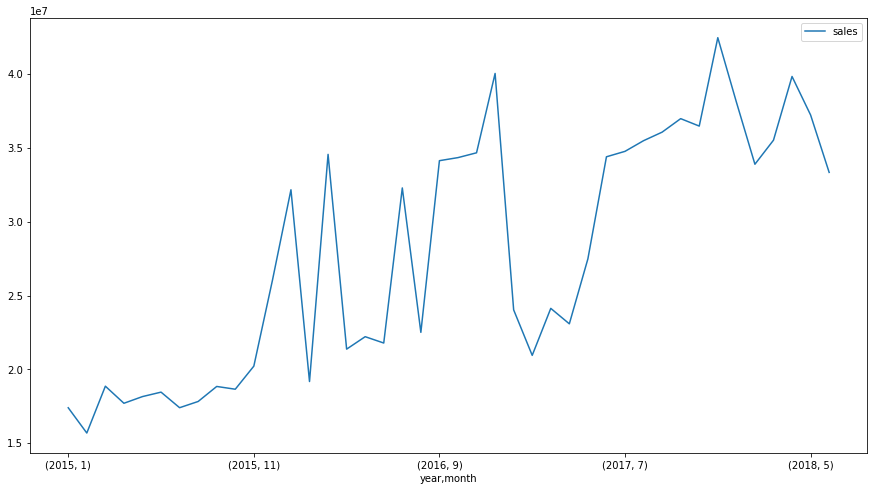

In [63]:
Train_MY_sales.plot(figsize=(15, 8))

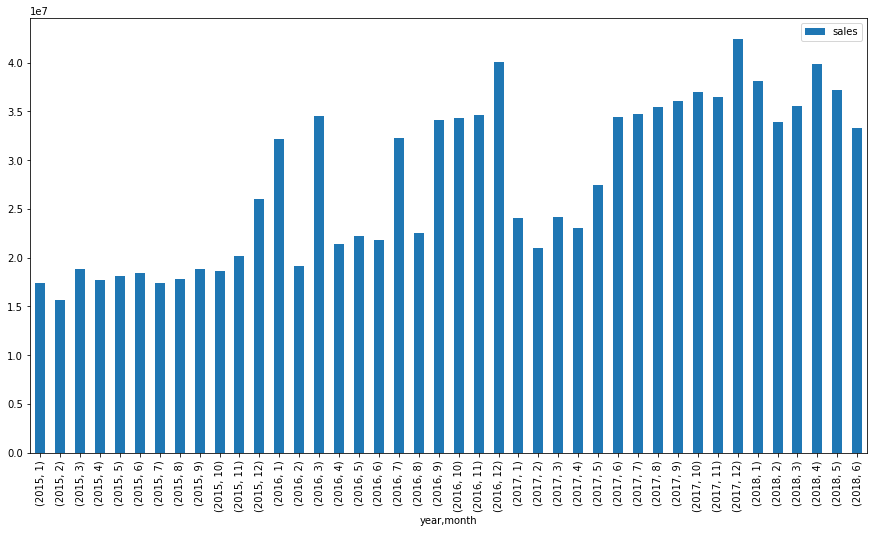

In [64]:
Train_MY_sales.plot.bar(figsize=(15, 8))

In [65]:
Train_MYC_sales =Train.groupby(['city','year','month']).sum().drop(['medicine', 'discounted', 'footfall','day' ], axis =1)

In [66]:
Train_MYC_sales.head()

sales
city      year month             
Ahmedabad 2015 1      1167564.516
               2      1033280.568
               3      1300014.344
               4      1251577.032
               5      1314320.372

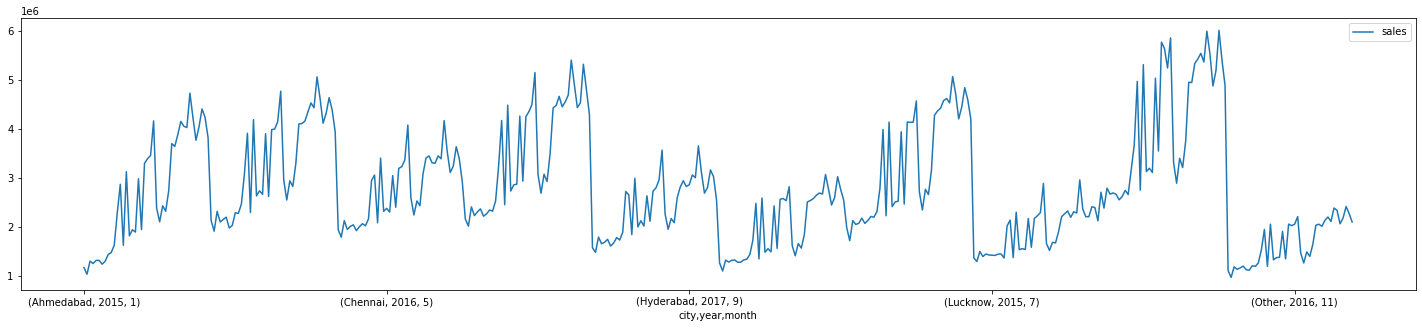

In [67]:
Train_MYC_sales.plot(figsize=(25, 5))

In [68]:
Train_DMYC_sales =Train.groupby(['year','month', 'day']).sum().drop(['medicine', 'discounted', 'footfall' ], axis =1)

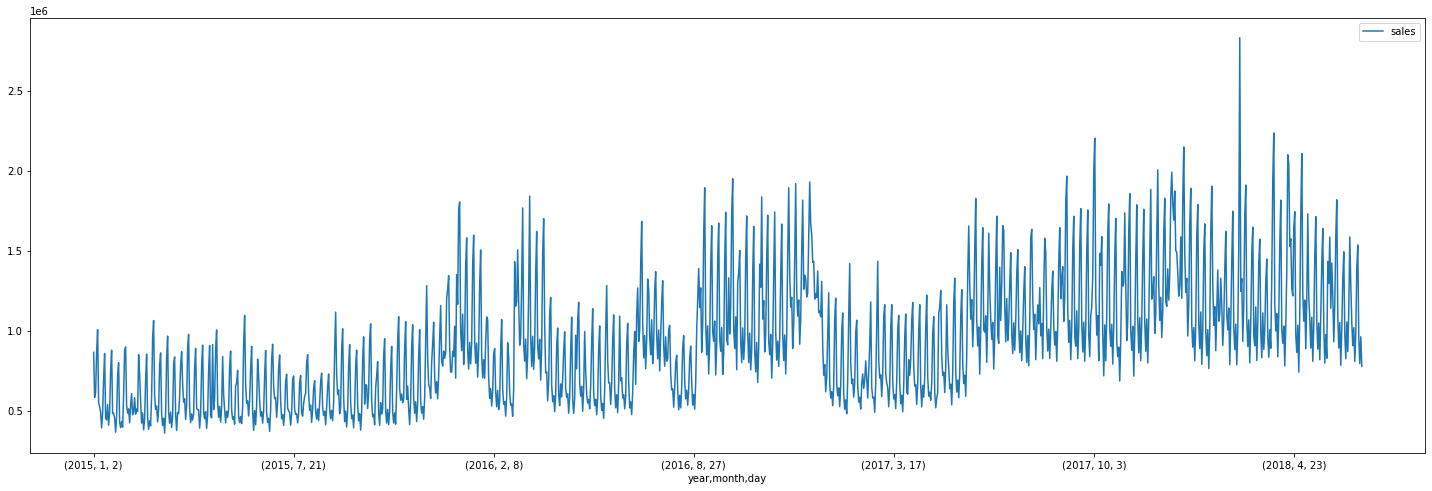

In [69]:
Train_DMYC_sales.plot(figsize=(25, 8))

In [70]:
Train.columns

Index(['city', 'medicine', 'sales', 'date', 'discounted', 'footfall', 'year',
       'month', 'day'],
      dtype='object')

In [71]:
Train['city'].unique()

array(['Kolkata', 'Other', 'Jaipur', 'Mumbai', 'Delhi', 'Chennai',
       'Bangalore', 'Hyderabad', 'Ahmedabad', 'Lucknow'], dtype=object)

In [72]:
Train_Kolkata = Train[Train['city']== 'Kolkata']

In [73]:
Train_Kolkata.head()

,city,medicine,sales,date,discounted,footfall,year,month,day
0,Kolkata,1,24.0,2015-01-02,NaN,13948.0,2015,1,2
1,Kolkata,2,144.0,2015-01-02,NaN,13948.0,2015,1,2
2,Kolkata,3,84.0,2015-01-02,NaN,13948.0,2015,1,2
3,Kolkata,4,24.0,2015-01-02,NaN,13948.0,2015,1,2
4,Kolkata,5,8.0,2015-01-02,NaN,13948.0,2015,1,2


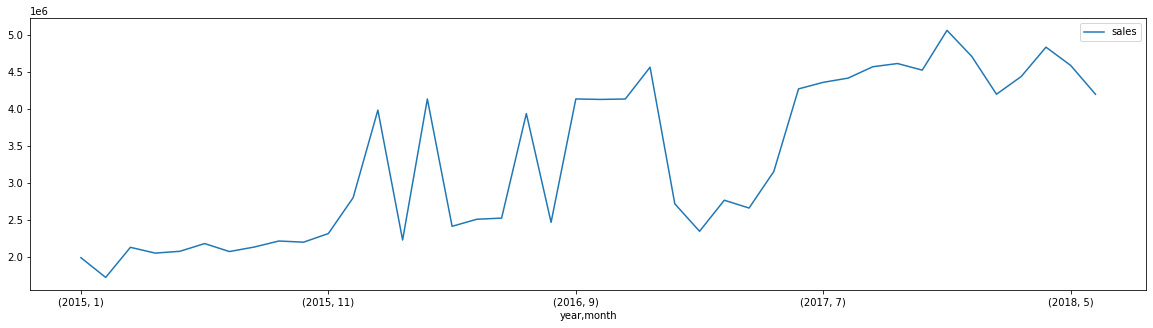

In [74]:
Train_Kolkata.groupby(['year','month']).sum().drop(['medicine', 'discounted', 'footfall','day' ], axis =1).plot(figsize=(20, 5))

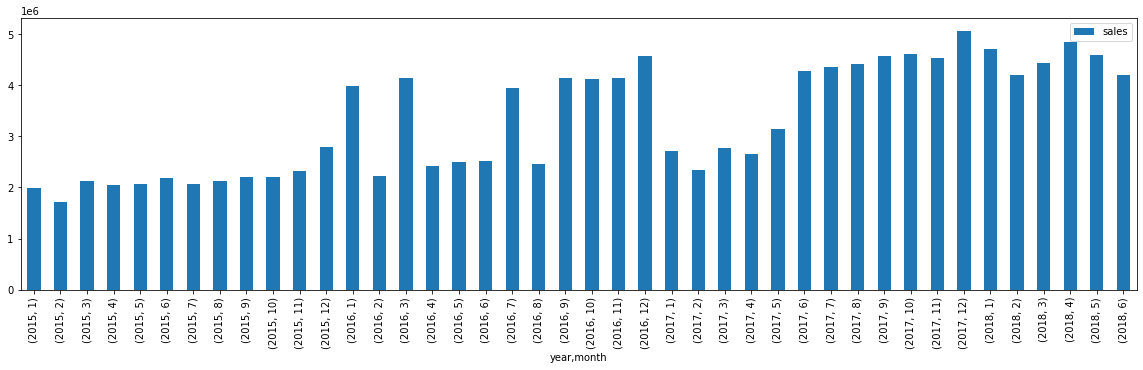

In [75]:
Train_Kolkata.groupby(['year','month']).sum().drop(['medicine', 'discounted', 'footfall','day' ], axis =1).plot.bar(figsize=(20, 5))

"Mumbai": 4 , "Delhi": 5, "Bangalore": 7, "Kolkata": 1, "Chennai": 6, "Hyderabad": 8, "Ahmedabad": 9, "Jaipur": 3, "Lucknow": 10, "Other": 2

In [76]:
Monthly_Sales = Train.groupby(['city','year', 'month']).agg({'sales': ['sum']})
Monthly_Sales_Kolkata = Train.loc[Train['city']== 'Kolkata'].groupby(['year', 'month']).agg({'sales': ['sum']}).reset_index()
Monthly_Sales_Other = Train.loc[Train['city']== 'Other'].groupby(['year', 'month']).agg({'sales': ['sum']}).reset_index()
Monthly_Sales_Jaipur = Train.loc[Train['city']== 'Jaipur'].groupby(['year', 'month']).agg({'sales': ['sum']}).reset_index()
Monthly_Sales_Mumbai = Train.loc[Train['city']== 'Mumbai'].groupby(['year', 'month']).agg({'sales': ['sum']}).reset_index()
Monthly_Sales_Delhi = Train.loc[Train['city']== 'Delhi'].groupby(['year', 'month']).agg({'sales': ['sum']}).reset_index()
Monthly_Sales_Chennai = Train.loc[Train['city']== 'Chennai'].groupby(['year', 'month']).agg({'sales': ['sum']}).reset_index()
Monthly_Sales_Bangalore = Train.loc[Train['city']== 'Bangalore'].groupby(['year', 'month']).agg({'sales': ['sum']}).reset_index()
Monthly_Sales_Hyderabad = Train.loc[Train['city']== 'Hyderabad'].groupby(['year', 'month']).agg({'sales': ['sum']}).reset_index()
Monthly_Sales_Ahmedabad = Train.loc[Train['city']== 'Ahmedabad'].groupby(['year', 'month']).agg({'sales': ['sum']}).reset_index()
Monthly_Sales_Lucknow = Train.loc[Train['city']== 'Lucknow'].groupby(['year', 'month']).agg({'sales': ['sum']}).reset_index()

In [77]:
Monthly_Sales_Ahmedabad.head()

,year,month,sales
,,,sum
0,2015,1,1167564.516
1,2015,2,1033280.568
2,2015,3,1300014.344
3,2015,4,1251577.032
4,2015,5,1314320.372


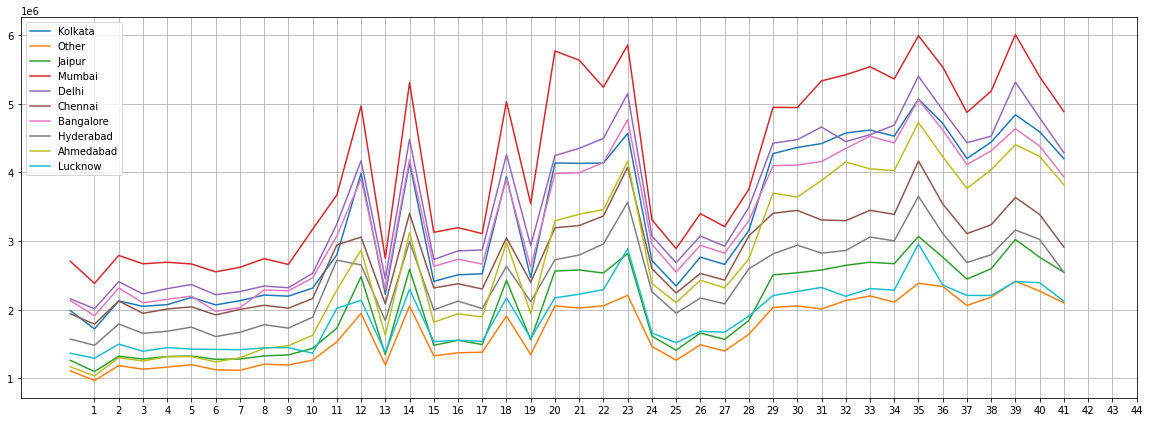

In [78]:
plt.figure(figsize=(20,7))
sns.lineplot(Monthly_Sales_Kolkata['sales']['sum'].index, Monthly_Sales_Kolkata['sales']['sum'].values)
sns.lineplot(Monthly_Sales_Other['sales']['sum'].index, Monthly_Sales_Other['sales']['sum'].values)
sns.lineplot(Monthly_Sales_Jaipur['sales']['sum'].index, Monthly_Sales_Jaipur['sales']['sum'].values)
sns.lineplot(Monthly_Sales_Mumbai['sales']['sum'].index, Monthly_Sales_Mumbai['sales']['sum'].values)
sns.lineplot(Monthly_Sales_Delhi['sales']['sum'].index, Monthly_Sales_Delhi['sales']['sum'].values)
sns.lineplot(Monthly_Sales_Chennai['sales']['sum'].index, Monthly_Sales_Chennai['sales']['sum'].values)
sns.lineplot(Monthly_Sales_Bangalore['sales']['sum'].index, Monthly_Sales_Bangalore['sales']['sum'].values)
sns.lineplot(Monthly_Sales_Hyderabad['sales']['sum'].index, Monthly_Sales_Hyderabad['sales']['sum'].values)
sns.lineplot(Monthly_Sales_Ahmedabad['sales']['sum'].index, Monthly_Sales_Ahmedabad['sales']['sum'].values)
sns.lineplot(Monthly_Sales_Lucknow['sales']['sum'].index, Monthly_Sales_Lucknow['sales']['sum'].values)

plt.grid()
plt.xticks(np.arange(1, 45, step=1))
plt.legend(['Kolkata', 'Other', 'Jaipur', 'Mumbai', 'Delhi', 'Chennai', 'Bangalore', 'Hyderabad', 'Ahmedabad', 'Lucknow'])
plt.show()

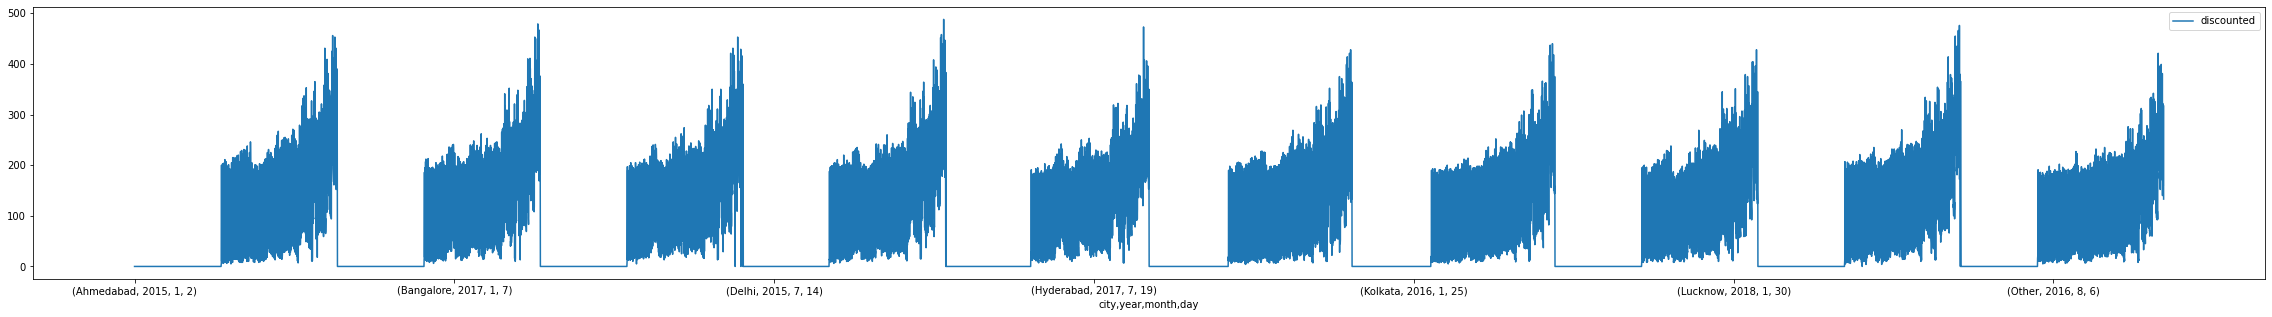

In [79]:
Train.groupby(['city','year','month','day']).sum().drop(['medicine', 'sales', 'footfall' ], axis =1).plot(figsize=(40, 5))

In [80]:
Discount = Train.groupby(['city','year', 'month']).agg({'discounted': ['sum']})
Discount_Kolkata = Train.loc[Train['city']== 'Kolkata'].groupby(['year', 'month']).agg({'discounted': ['sum']}).reset_index()
Discount_Other = Train.loc[Train['city']== 'Other'].groupby(['year', 'month']).agg({'discounted': ['sum']}).reset_index()
Discount_Jaipur = Train.loc[Train['city']== 'Jaipur'].groupby(['year', 'month']).agg({'discounted': ['sum']}).reset_index()
Discount_Mumbai = Train.loc[Train['city']== 'Mumbai'].groupby(['year', 'month']).agg({'discounted': ['sum']}).reset_index()
Discount_Delhi = Train.loc[Train['city']== 'Delhi'].groupby(['year', 'month']).agg({'discounted': ['sum']}).reset_index()
Discount_Chennai = Train.loc[Train['city']== 'Chennai'].groupby(['year', 'month']).agg({'discounted': ['sum']}).reset_index()
Discount_Bangalore = Train.loc[Train['city']== 'Bangalore'].groupby(['year', 'month']).agg({'discounted': ['sum']}).reset_index()
Discount_Hyderabad = Train.loc[Train['city']== 'Hyderabad'].groupby(['year', 'month']).agg({'discounted': ['sum']}).reset_index()
Discount_Ahmedabad = Train.loc[Train['city']== 'Ahmedabad'].groupby(['year', 'month']).agg({'discounted': ['sum']}).reset_index()
Discount_Lucknow = Train.loc[Train['city']== 'Lucknow'].groupby(['year', 'month']).agg({'discounted': ['sum']}).reset_index()

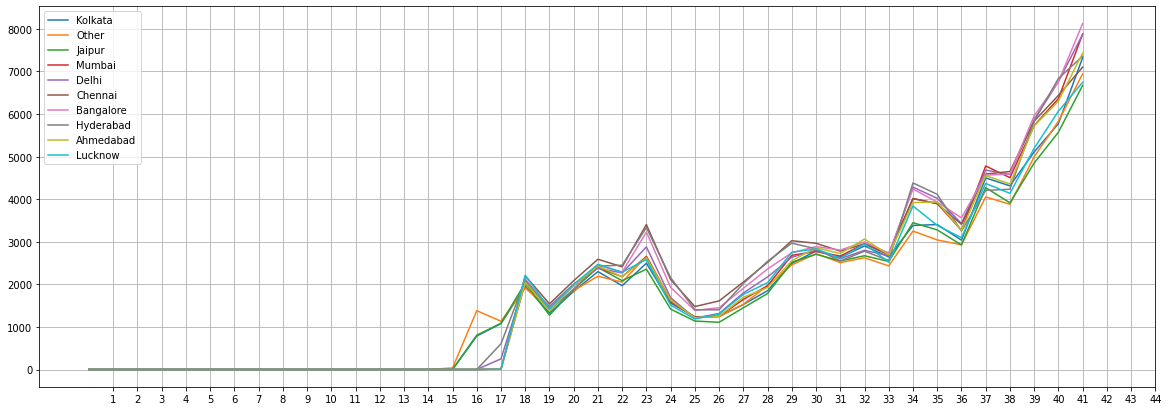

In [81]:
plt.figure(figsize=(20,7))
sns.lineplot(Discount_Kolkata['discounted']['sum'].index, Discount_Kolkata['discounted']['sum'].values)
sns.lineplot(Discount_Other['discounted']['sum'].index, Discount_Other['discounted']['sum'].values)
sns.lineplot(Discount_Jaipur['discounted']['sum'].index, Discount_Jaipur['discounted']['sum'].values)
sns.lineplot(Discount_Mumbai['discounted']['sum'].index, Discount_Mumbai['discounted']['sum'].values)
sns.lineplot(Discount_Delhi['discounted']['sum'].index, Discount_Delhi['discounted']['sum'].values)
sns.lineplot(Discount_Chennai['discounted']['sum'].index, Discount_Chennai['discounted']['sum'].values)
sns.lineplot(Discount_Bangalore['discounted']['sum'].index, Discount_Bangalore['discounted']['sum'].values)
sns.lineplot(Discount_Hyderabad['discounted']['sum'].index, Discount_Hyderabad['discounted']['sum'].values)
sns.lineplot(Discount_Ahmedabad['discounted']['sum'].index, Discount_Ahmedabad['discounted']['sum'].values)
sns.lineplot(Discount_Lucknow['discounted']['sum'].index, Discount_Lucknow['discounted']['sum'].values)

plt.grid()
plt.xticks(np.arange(1, 45, step=1))
plt.legend(['Kolkata', 'Other', 'Jaipur', 'Mumbai', 'Delhi', 'Chennai', 'Bangalore', 'Hyderabad', 'Ahmedabad', 'Lucknow'])
plt.show()

In [82]:
Train.head()

,city,medicine,sales,date,discounted,footfall,year,month,day
0,Kolkata,1,24.0,2015-01-02,NaN,13948.0,2015,1,2
1,Kolkata,2,144.0,2015-01-02,NaN,13948.0,2015,1,2
2,Kolkata,3,84.0,2015-01-02,NaN,13948.0,2015,1,2
3,Kolkata,4,24.0,2015-01-02,NaN,13948.0,2015,1,2
4,Kolkata,5,8.0,2015-01-02,NaN,13948.0,2015,1,2


In [83]:
Train.isnull().sum()

city                0
medicine            0
sales               0
date                0
discounted    6119931
footfall        56694
year                0
month               0
day                 0
dtype: int64

In [84]:
Train1 = Train.replace(city_replace_num)
Train1.head()

,city,medicine,sales,date,discounted,footfall,year,month,day
0,1,1,24.0,2015-01-02,NaN,13948.0,2015,1,2
1,1,2,144.0,2015-01-02,NaN,13948.0,2015,1,2
2,1,3,84.0,2015-01-02,NaN,13948.0,2015,1,2
3,1,4,24.0,2015-01-02,NaN,13948.0,2015,1,2
4,1,5,8.0,2015-01-02,NaN,13948.0,2015,1,2


In [85]:
(Train1['discounted']== 0).sum()

15763192

In [86]:
(Train1['discounted']== 1).sum()

740032

In [87]:
742094/15807528

0.04694560718159095

In [88]:
Train2 = Train.drop(['year', 'sales', 'footfall', 'date' ], axis =1)
Train2.head()

,city,medicine,discounted,month,day
0,Kolkata,1,NaN,1,2
1,Kolkata,2,NaN,1,2
2,Kolkata,3,NaN,1,2
3,Kolkata,4,NaN,1,2
4,Kolkata,5,NaN,1,2


In [89]:
Train2 = Train2.groupby(['medicine','month', 'day',"city"]).mean().reset_index()

In [90]:
Train2.head()

,medicine,month,day,city,discounted
0,1,1,2,Ahmedabad,0.0
1,1,1,2,Bangalore,0.0
2,1,1,2,Chennai,0.0
3,1,1,2,Delhi,0.0
4,1,1,2,Hyderabad,0.0


In [91]:
Train2.isnull().sum()

medicine           0
month              0
day                0
city               0
discounted    220913
dtype: int64

In [92]:
Train3 = Train[Train.discounted.isnull()]

In [93]:
Train3.head()

,city,medicine,sales,date,discounted,footfall,year,month,day
0,Kolkata,1,24.0,2015-01-02,NaN,13948.0,2015,1,2
1,Kolkata,2,144.0,2015-01-02,NaN,13948.0,2015,1,2
2,Kolkata,3,84.0,2015-01-02,NaN,13948.0,2015,1,2
3,Kolkata,4,24.0,2015-01-02,NaN,13948.0,2015,1,2
4,Kolkata,5,8.0,2015-01-02,NaN,13948.0,2015,1,2


In [94]:
Train3.shape

(6119931, 9)

In [95]:
Train3.isnull().sum()

city                0
medicine            0
sales               0
date                0
discounted    6119931
footfall            0
year                0
month               0
day                 0
dtype: int64

In [96]:
Train.head()

,city,medicine,sales,date,discounted,footfall,year,month,day
0,Kolkata,1,24.0,2015-01-02,NaN,13948.0,2015,1,2
1,Kolkata,2,144.0,2015-01-02,NaN,13948.0,2015,1,2
2,Kolkata,3,84.0,2015-01-02,NaN,13948.0,2015,1,2
3,Kolkata,4,24.0,2015-01-02,NaN,13948.0,2015,1,2
4,Kolkata,5,8.0,2015-01-02,NaN,13948.0,2015,1,2


In [97]:
Train.shape

(22624345, 9)

In [98]:
1511505/18061127

0.08368829918531662

In [99]:
Train3 = Train3.drop(['discounted'], axis=1)

In [100]:
Train3 = Train3.merge(Train2[['medicine','day', 'month', 'city', 'discounted']], on = ['medicine','day', 'month', 'city'], how = 'left')

In [101]:
Train3.head()

,city,medicine,sales,date,footfall,year,month,day,discounted
0,Kolkata,1,24.0,2015-01-02,13948.0,2015,1,2,0.5
1,Kolkata,2,144.0,2015-01-02,13948.0,2015,1,2,0.0
2,Kolkata,3,84.0,2015-01-02,13948.0,2015,1,2,0.0
3,Kolkata,4,24.0,2015-01-02,13948.0,2015,1,2,0.0
4,Kolkata,5,8.0,2015-01-02,13948.0,2015,1,2,0.0


In [102]:
Train3.isnull().sum()

city               0
medicine           0
sales              0
date               0
footfall           0
year               0
month              0
day                0
discounted    242854
dtype: int64

In [103]:
Train3 = Train3.interpolate(method ='linear', limit_direction ='backward')

In [104]:
Train3.isnull().sum()

city          0
medicine      0
sales         0
date          0
footfall      0
year          0
month         0
day           0
discounted    0
dtype: int64

In [105]:
Train = Train.fillna(Train3)

In [106]:
Train.head()

,city,medicine,sales,date,discounted,footfall,year,month,day
0,Kolkata,1,24.0,2015-01-02,0.5,13948.0,2015,1,2
1,Kolkata,2,144.0,2015-01-02,0.0,13948.0,2015,1,2
2,Kolkata,3,84.0,2015-01-02,0.0,13948.0,2015,1,2
3,Kolkata,4,24.0,2015-01-02,0.0,13948.0,2015,1,2
4,Kolkata,5,8.0,2015-01-02,0.0,13948.0,2015,1,2


In [107]:
Train.isnull().sum()

city              0
medicine          0
sales             0
date              0
discounted        0
footfall      56694
year              0
month             0
day               0
dtype: int64

In [108]:
Train.describe()

,medicine,sales,discounted,footfall,year,month,day
count,2.262434e+07,2.262434e+07,2.262434e+07,2.256765e+07,2.262434e+07,2.262434e+07,2.262434e+07
mean,1.169635e+03,5.166032e+01,4.325360e-02,1.283139e+04,2.016510e+03,6.220520e+00,1.572557e+01
std,8.016848e+02,1.100297e+02,1.919732e-01,3.776963e+03,1.023379e+00,3.449989e+00,8.789664e+00
min,1.000000e+00,-9.948000e+03,0.000000e+00,3.060000e+03,2.015000e+03,1.000000e+00,1.000000e+00
25%,5.110000e+02,1.200000e+01,0.000000e+00,1.028400e+04,2.016000e+03,3.000000e+00,8.000000e+00
50%,1.034000e+03,2.800000e+01,0.000000e+00,1.228000e+04,2.017000e+03,6.000000e+00,1.600000e+01
75%,1.718000e+03,5.600000e+01,0.000000e+00,1.500400e+04,2.017000e+03,9.000000e+00,2.300000e+01
max,3.389000e+03,8.299200e+04,1.000000e+00,3.343600e+04,2.018000e+03,1.200000e+01,3.100000e+01


In [109]:
Train['discounted'] = np.where(Train['discounted'] > 0.5, 1, Train['discounted'] )
Train['discounted'] = np.where(Train['discounted'] <= 0.5,0, Train['discounted'] )

In [110]:
Train.shape

(22624345, 9)

In [111]:
Train.discounted.unique()

array([0., 1.])

In [112]:
(Train['discounted']== 0).sum()

21832456

In [113]:
(Train['discounted']== 1).sum()

791889

In [114]:
Sales_med = Train.groupby([ 'medicine']).agg({'sales': ['sum']}).reset_index()

In [115]:
Sales_med.head()

,medicine,sales
,,sum
0,1,271424.0
1,2,941056.0
2,3,1683712.0
3,4,258160.0
4,5,108980.0


In [116]:
Sales_med.columns

MultiIndex([('medicine',    ''),
            (   'sales', 'sum')],
           )

In [117]:
Sales_med.nlargest(5, [(   'sales', 'sum')])

,medicine,sales
,,sum
1076,1077,9.419176e+06
2102,2103,8.920119e+06
573,574,6.863623e+06
2050,2051,6.183207e+06
315,316,5.231748e+06


In [ ]:
from google.colab import files
Train.to_csv('Train.csv')
files.download("Train.csv")

In [119]:
Train = pd.read_csv('/content/drive/MyDrive/Data_Science/Train.csv')

In [120]:
Train.head()

,Unnamed: 0,city,medicine,sales,date,discounted,footfall,year,month,day
0,0,Kolkata,1,24.0,2015-01-02,0.0,13948.0,2015,1,2
1,1,Kolkata,2,144.0,2015-01-02,0.0,13948.0,2015,1,2
2,2,Kolkata,3,84.0,2015-01-02,0.0,13948.0,2015,1,2
3,3,Kolkata,4,24.0,2015-01-02,0.0,13948.0,2015,1,2
4,4,Kolkata,5,8.0,2015-01-02,0.0,13948.0,2015,1,2


In [121]:
Train.dtypes

Unnamed: 0      int64
city           object
medicine        int64
sales         float64
date           object
discounted    float64
footfall      float64
year            int64
month           int64
day             int64
dtype: object

In [122]:
Train['date']=pd.to_datetime(Train['date'])

In [123]:
Train.dtypes

Unnamed: 0             int64
city                  object
medicine               int64
sales                float64
date          datetime64[ns]
discounted           float64
footfall             float64
year                   int64
month                  int64
day                    int64
dtype: object

##FBPROPHET

In [124]:
!pip install fbprophet

In [125]:
Train_1 = Train.drop(['Unnamed: 0', 'year', 'month', 'day', 'footfall'], axis = 1)

In [126]:
Train_1.head()

,city,medicine,sales,date,discounted
0,Kolkata,1,24.0,2015-01-02,0.0
1,Kolkata,2,144.0,2015-01-02,0.0
2,Kolkata,3,84.0,2015-01-02,0.0
3,Kolkata,4,24.0,2015-01-02,0.0
4,Kolkata,5,8.0,2015-01-02,0.0


In [127]:
Train_1 = Train_1.rename({'date': "ds", 'sales': 'y'}, axis= 'columns')

In [128]:
Train_1

,city,medicine,y,ds,discounted
0,Kolkata,1,24.0,2015-01-02,0.0
1,Kolkata,2,144.0,2015-01-02,0.0
2,Kolkata,3,84.0,2015-01-02,0.0
3,Kolkata,4,24.0,2015-01-02,0.0
4,Kolkata,5,8.0,2015-01-02,0.0
...,...,...,...,...,...
22624340,Lucknow,3056,8.0,2018-06-30,1.0
22624341,Lucknow,3163,16.0,2018-06-30,0.0
22624342,Lucknow,3164,8.0,2018-06-30,0.0
22624343,Lucknow,3157,4.0,2018-06-30,0.0


In [129]:
Train_1.dtypes

city                  object
medicine               int64
y                    float64
ds            datetime64[ns]
discounted           float64
dtype: object

In [130]:
Train_1.city.unique()

array(['Kolkata', 'Other', 'Jaipur', 'Mumbai', 'Delhi', 'Chennai',
       'Bangalore', 'Hyderabad', 'Ahmedabad', 'Lucknow'], dtype=object)

In [131]:
Train_1_Kolkata = Train_1.loc[Train_1['city'] == 'Kolkata' ]
Train_1_Other = Train_1.loc[Train_1['city'] == 'Other' ]
Train_1_Jaipur = Train_1.loc[Train_1['city'] == 'Jaipur' ]
Train_1_Mumbai = Train_1.loc[Train_1['city'] == 'Mumbai' ]
Train_1_Delhi = Train_1.loc[Train_1['city'] == 'Delhi' ]
Train_1_Chennai = Train_1.loc[Train_1['city'] == 'Chennai' ]
Train_1_Bangalore = Train_1.loc[Train_1['city'] == 'Bangalore' ]
Train_1_Hyderabad = Train_1.loc[Train_1['city'] == 'Hyderabad' ]
Train_1_Ahmedabad = Train_1.loc[Train_1['city'] == 'Ahmedabad' ]
Train_1_Lucknow = Train_1.loc[Train_1['city'] == 'Lucknow' ]

In [132]:
Train_1_Kolkata_med1076 = Train_1_Kolkata.loc[Train_1_Kolkata['medicine'] == 1076 ].drop(['city', 'medicine','discounted'], axis =1)
Train_1_Other_med1076 = Train_1_Other.loc[Train_1_Other['medicine'] == 1076 ].drop(['city', 'medicine','discounted'], axis =1)
Train_1_Jaipur_med1076 = Train_1_Jaipur.loc[Train_1_Jaipur['medicine'] == 1076 ].drop(['city', 'medicine','discounted'], axis =1)
Train_1_Mumbai_med1076 = Train_1_Mumbai.loc[Train_1_Mumbai['medicine'] == 1076 ].drop(['city', 'medicine','discounted'], axis =1)
Train_1_Delhi_med1076 = Train_1_Delhi.loc[Train_1_Delhi['medicine'] == 1076 ].drop(['city', 'medicine','discounted'], axis =1)
Train_1_Chennai_med1076 = Train_1_Chennai.loc[Train_1_Chennai['medicine'] == 1076 ].drop(['city', 'medicine','discounted'], axis =1)
Train_1_Bangalore_med1076 = Train_1_Bangalore.loc[Train_1_Bangalore['medicine'] == 1076 ].drop(['city', 'medicine','discounted'], axis =1)
Train_1_Hyderabad_med1076 = Train_1_Hyderabad.loc[Train_1_Hyderabad['medicine'] == 1076 ].drop(['city', 'medicine','discounted'], axis =1)
Train_1_Ahmedabad_med1076 = Train_1_Ahmedabad.loc[Train_1_Ahmedabad['medicine'] == 1076 ].drop(['city', 'medicine','discounted'], axis =1)
Train_1_Lucknow_med1076 = Train_1_Lucknow.loc[Train_1_Lucknow['medicine'] == 1076 ].drop(['city', 'medicine','discounted'], axis =1)

In [133]:
type(Train_1_Kolkata_med1076)

pandas.core.frame.DataFrame

In [134]:
Train_1_Kolkata_med1076.head()

,y,ds
1075,144.0,2015-01-02
12880,164.0,2015-01-03
24313,96.0,2015-01-04
35975,268.0,2015-01-05
48087,272.0,2015-01-06


In [ ]:
Medicine_Kolkata = Train_1_Kolkata.groupby('medicine')
Medicine_Other = Train_1_Other.groupby('medicine')
Medicine_Jaipur = Train_1_Jaipur.groupby('medicine')
Medicine_Mumbai = Train_1_Mumbai.groupby('medicine')
Medicine_Delhi = Train_1_Delhi.groupby('medicine')
Medicine_Chennai = Train_1_Chennai.groupby('medicine')
Medicine_Bangalore = Train_1_Bangalore.groupby('medicine')
Medicine_Hyderabad = Train_1_Hyderabad.groupby('medicine')
Medicine_Ahmedabad = Train_1_Ahmedabad.groupby('medicine')
Medicine_Lucknow = Train_1_Lucknow.groupby('medicine')

In [136]:
from fbprophet import Prophet

In [137]:
Reg_fbp = Prophet(interval_width= 0.95)

In [138]:
Reg_fbp.fit(Train_1_Kolkata_med1076)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [139]:
future = Reg_fbp.make_future_dataframe(periods=45)
future.tail()

,ds
1293,2018-08-04
1294,2018-08-05
1295,2018-08-06
1296,2018-08-07
1297,2018-08-08


In [140]:
forecast = Reg_fbp.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1293,2018-08-04,150.707888,49.682439,251.494115
1294,2018-08-05,157.931425,59.989075,265.232147
1295,2018-08-06,198.722734,91.110619,301.670370
1296,2018-08-07,234.360480,128.413273,338.510001
1297,2018-08-08,191.677071,95.469668,302.405622


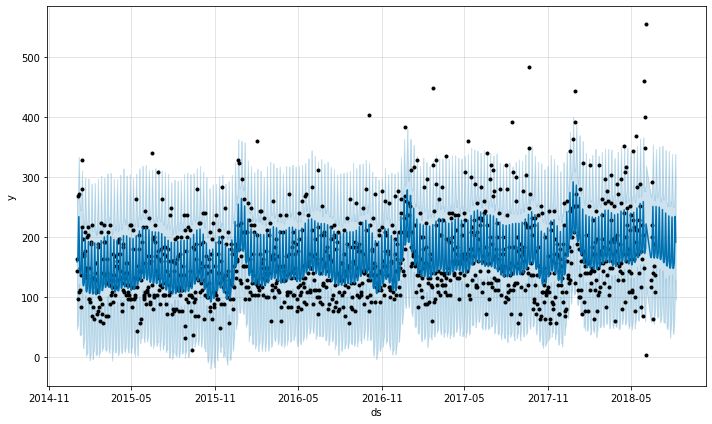

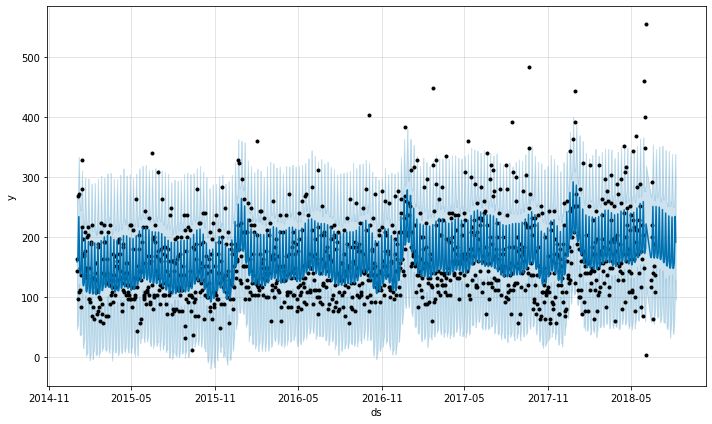

In [141]:
Reg_fbp.plot(forecast)

In [142]:
Train_1.isnull().sum()

city          0
medicine      0
y             0
ds            0
discounted    0
dtype: int64

In [143]:
Train_1['month'] = Train_1['ds'].dt.month

In [144]:
Train_1

,city,medicine,y,ds,discounted,month
0,Kolkata,1,24.0,2015-01-02,0.0,1
1,Kolkata,2,144.0,2015-01-02,0.0,1
2,Kolkata,3,84.0,2015-01-02,0.0,1
3,Kolkata,4,24.0,2015-01-02,0.0,1
4,Kolkata,5,8.0,2015-01-02,0.0,1
...,...,...,...,...,...,...
22624340,Lucknow,3056,8.0,2018-06-30,1.0,6
22624341,Lucknow,3163,16.0,2018-06-30,0.0,6
22624342,Lucknow,3164,8.0,2018-06-30,0.0,6
22624343,Lucknow,3157,4.0,2018-06-30,0.0,6


In [145]:
Train_1[['y', 'medicine']].corr()

,y,medicine
y,1.000000,0.008078
medicine,0.008078,1.000000


In [146]:
Train_1[['y', 'discounted']].corr()

,y,discounted
y,1.000000,0.055434
discounted,0.055434,1.000000


#MODEL

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Data_Science/test_data.csv')

In [ ]:
test

,id,year,month,day,city,medicine
0,1,2018,7,1,1,1292
1,2,2018,7,1,1,1
2,3,2018,7,1,1,2
3,4,2018,7,1,1,3
4,5,2018,7,1,1,4
...,...,...,...,...,...,...
773530,773531,2018,7,31,10,3163
773531,773532,2018,7,31,10,3164
773532,773533,2018,7,31,10,3157
773533,773534,2018,7,31,10,3165


In [ ]:
test.nunique()

id          773535
year             1
month            1
day             31
city            10
medicine      3289
dtype: int64

In [ ]:
from datetime import datetime
test['dateInt']=test['year'].astype(str) + test['month'].astype(str).str.zfill(2)+ test['day'].astype(str).str.zfill(2)
test['date'] = pd.to_datetime(test['dateInt'], format='%Y%m%d')

In [ ]:
test.head()

,id,year,month,day,city,medicine,dateInt,date
0,1,2018,7,1,1,1292,20180701,2018-07-01
1,2,2018,7,1,1,1,20180701,2018-07-01
2,3,2018,7,1,1,2,20180701,2018-07-01
3,4,2018,7,1,1,3,20180701,2018-07-01
4,5,2018,7,1,1,4,20180701,2018-07-01


In [ ]:
test = test.drop(['year', 'month', 'day', 'dateInt'], axis=1)

In [ ]:
test.head()

,id,city,medicine,date
0,1,1,1292,2018-07-01
1,2,1,1,2018-07-01
2,3,1,2,2018-07-01
3,4,1,3,2018-07-01
4,5,1,4,2018-07-01


In [ ]:
test.shape

(773535, 4)

In [ ]:
Test = test.merge(discount[['date', 'city', 'medicine', 'discounted']], on = ['date','city', 'medicine'], how = 'left')

In [ ]:
Test.shape

(773535, 5)

In [ ]:
Test.head()

,id,city,medicine,date,discounted
0,1,1,1292,2018-07-01,0
1,2,1,1,2018-07-01,0
2,3,1,2,2018-07-01,1
3,4,1,3,2018-07-01,0
4,5,1,4,2018-07-01,0


In [ ]:
Test.nunique()

id            773535
city              10
medicine        3289
date              31
discounted         2
dtype: int64

In [ ]:
Test.isnull().sum()

id            0
city          0
medicine      0
date          0
discounted    0
dtype: int64

In [ ]:
Test['year']= Test['date'].dt.year
Test['month']= Test['date'].dt.month
Test['day']= Test['date'].dt.day

In [ ]:
Test.head()

,id,city,medicine,date,discounted,year,month,day
0,1,1,1292,2018-07-01,0,2018,7,1
1,2,1,1,2018-07-01,0,2018,7,1
2,3,1,2,2018-07-01,1,2018,7,1
3,4,1,3,2018-07-01,0,2018,7,1
4,5,1,4,2018-07-01,0,2018,7,1


In [ ]:
Test.nunique()

id            773535
city              10
medicine        3289
date              31
discounted         2
year               1
month              1
day               31
dtype: int64

In [ ]:
Train_2 = Train.drop(['footfall', 'Unnamed: 0', 'date'], axis =1)

In [ ]:
Train_2.head()

,city,medicine,sales,discounted,year,month,day
0,Kolkata,1,24.0,0.0,2015,1,2
1,Kolkata,2,144.0,0.0,2015,1,2
2,Kolkata,3,84.0,0.0,2015,1,2
3,Kolkata,4,24.0,0.0,2015,1,2
4,Kolkata,5,8.0,0.0,2015,1,2


In [ ]:
city_replace_num = {"city": {"Mumbai": 4 , "Delhi": 5, "Bangalore": 7, "Kolkata": 1, "Chennai": 6, "Hyderabad": 8, "Ahmedabad": 9, "Jaipur": 3, "Lucknow": 10, "Other": 2}}

In [ ]:
Train_2 = Train_2.replace(city_replace_num)
Train_2.head()

,city,medicine,sales,discounted,year,month,day
0,1,1,24.0,0.0,2015,1,2
1,1,2,144.0,0.0,2015,1,2
2,1,3,84.0,0.0,2015,1,2
3,1,4,24.0,0.0,2015,1,2
4,1,5,8.0,0.0,2015,1,2


In [ ]:
Train_2.dtypes

city            int64
medicine        int64
sales         float64
discounted    float64
year            int64
month           int64
day             int64
dtype: object

In [ ]:
y_2=Train_2["sales"]
X_2=Train_2.drop('sales', axis=1)

In [ ]:
y_2.head()

0     24.0
1    144.0
2     84.0
3     24.0
4      8.0
Name: sales, dtype: float64

In [ ]:
X_2.head()

,city,medicine,discounted,year,month,day
0,1,1,0.0,2015,1,2
1,1,2,0.0,2015,1,2
2,1,3,0.0,2015,1,2
3,1,4,0.0,2015,1,2
4,1,5,0.0,2015,1,2


In [ ]:
Test_2 = Test.drop(['id', 'date'], axis=1)

In [ ]:
Test_2.head()

,city,medicine,discounted,year,month,day
0,1,1292,0.0,2018,7,1
1,1,1,0.0,2018,7,1
2,1,2,1.0,2018,7,1
3,1,3,0.0,2018,7,1
4,1,4,0.0,2018,7,1


## Decision Tree

In [ ]:
Reg_dt = DecisionTreeRegressor(random_state=123)
Reg_dt.fit(X_2,y_2)

DecisionTreeRegressor(random_state=123)

In [ ]:
y_pred_train_dt = Reg_dt.predict(X_2)
y_pred_Test_dt = Reg_dt.predict(Test_2)

In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error

In [ ]:
mse_dt = sklearn.metrics.mean_squared_error(y_2, y_pred_train_dt)

In [ ]:
import math
rmse = math.sqrt(mse_dt)

In [ ]:
print(rmse)

1.6879271494318944


In [ ]:
predictionDT = pd.DataFrame(y_pred_Test_dt, columns=['sales'])

In [ ]:
predictionDT.head()

,sales
0,52.0
1,32.0
2,16.0
3,88.0
4,8.0


In [ ]:
from google.colab import files
predictionDT.to_csv('predictionDT.csv')
files.download("predictionDT.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Decision Tree with Grid-Search CV - Hyper-parameter Tuning

In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9],
           "min_samples_leaf":[1,2,3,4,5],
           "max_leaf_nodes":[None,10,20,30,40,50] }

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dt = DecisionTreeRegressor()

In [ ]:
tuning_model=GridSearchCV(dt,param_grid=parameters,scoring='neg_mean_squared_error',cv=5,verbose=3)

In [ ]:
tuning_model.fit(X_2,y_2)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-10553.263 total time=   4.9s
[CV 2/5] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-11191.882 total time=   4.7s
[CV 3/5] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-11575.151 total time=   4.5s
[CV 4/5] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-13263.355 total time=   4.3s
[CV 5/5] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-13824.227 total time=   4.6s
[CV 1/5] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=-10566.665 total time=   1.9s
[CV 2/5] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=-11191.882 total time=   2.0s
[CV 3/5] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=-11571.3

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 9,
 'max_leaf_nodes': None,
 'min_samples_leaf': 5,
 'splitter': 'best'}

In [ ]:
# best model score
tuning_model.best_score_

-9881.002049893106

In [ ]:
Reg_dt_hyp = DecisionTreeRegressor(max_depth=9, max_leaf_nodes= None, min_samples_leaf=5, splitter='best')

In [ ]:
Reg_dt_hyp.fit(X_2,y_2)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=5)

In [ ]:
y_pred_train_dt_hyp = Reg_dt_hyp.predict(X_2)
y_pred_Test_dt_hyp = Reg_dt_hyp.predict(Test_2)

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_2,y_pred_train_dt_hyp))
print('MSE:', metrics.mean_squared_error(y_2, y_pred_train_dt_hyp))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_2, y_pred_train_dt_hyp)))

MAE: 39.94728400032302
MSE: 9734.514298322769
RMSE: 98.66364223118245


In [ ]:
mse_dt = sklearn.metrics.mean_squared_error(y_2, y_pred_train_dt_hyp)

In [ ]:
import math
rmse = math.sqrt(mse_dt)

In [ ]:
print(rmse)

98.66364223118245


In [ ]:
predictionDT_hyp = pd.DataFrame(y_pred_Test_dt_hyp, columns=['sales'])

In [ ]:
from google.colab import files
predictionDT_hyp.to_csv('predictionDT_hyp.csv')
files.download("predictionDT_hyp.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
parameters_1={"max_depth" : [None,9],
           "min_samples_leaf":[1,5], }

In [ ]:
dt = DecisionTreeRegressor()

In [ ]:
tuning_model_1=GridSearchCV(dt,param_grid=parameters_1,scoring='neg_mean_squared_error',cv=5,verbose=3)

In [ ]:
tuning_model_1.fit(X_2,y_2)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1;, score=-9590.276 total time= 1.5min
[CV 2/5] END max_depth=None, min_samples_leaf=1;, score=-9214.640 total time= 1.5min
[CV 3/5] END max_depth=None, min_samples_leaf=1;, score=-9106.634 total time= 1.5min
[CV 4/5] END max_depth=None, min_samples_leaf=1;, score=-10959.170 total time= 1.5min
[CV 5/5] END max_depth=None, min_samples_leaf=1;, score=-10842.578 total time= 1.5min
[CV 1/5] END max_depth=None, min_samples_leaf=5;, score=-6612.192 total time= 1.2min
[CV 2/5] END max_depth=None, min_samples_leaf=5;, score=-5425.023 total time= 1.3min
[CV 3/5] END max_depth=None, min_samples_leaf=5;, score=-5752.503 total time= 1.3min
[CV 4/5] END max_depth=None, min_samples_leaf=5;, score=-6200.766 total time= 1.3min
[CV 5/5] END max_depth=None, min_samples_leaf=5;, score=-7977.986 total time= 1.3min
[CV 1/5] END max_depth=9, min_samples_leaf=1;, score=-9328.294 total time=  34.1s
[CV 2/

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 9], 'min_samples_leaf': [1, 5]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
tuning_model_1.best_params_

{'max_depth': None, 'min_samples_leaf': 5}

In [ ]:
tuning_model_1.best_score_

-6393.69407739262

In [ ]:
Reg_dt_hyp_1 = DecisionTreeRegressor( min_samples_leaf=5)

In [ ]:
Reg_dt_hyp_1.fit(X_2,y_2)

DecisionTreeRegressor(min_samples_leaf=5)

In [ ]:
y_pred_train_dt_hyp_1 = Reg_dt_hyp_1.predict(X_2)
y_pred_Test_dt_hyp_1 = Reg_dt_hyp_1.predict(Test_2)

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_2,y_pred_train_dt_hyp_1))
print('MSE:', metrics.mean_squared_error(y_2, y_pred_train_dt_hyp_1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_2, y_pred_train_dt_hyp_1)))

MAE: 17.646976868223973
MSE: 3373.052493901283
RMSE: 58.07798631066063


In [ ]:
predictionDT_hyp_1 = pd.DataFrame(y_pred_Test_dt_hyp_1, columns=['sales'])

In [ ]:
from google.colab import files
predictionDT_hyp_1.to_csv('predictionDT_hyp_1.csv')
files.download("predictionDT_hyp_1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Randomforest

In [ ]:
Reg_rf = RandomForestRegressor(n_estimators= 25, min_samples_leaf= 5 ,random_state= 123 )

In [ ]:
Reg_rf.fit(X_2,y_2)

RandomForestRegressor(min_samples_leaf=5, n_estimators=25, random_state=123)

In [ ]:
y_pred_train_rf = Reg_rf.predict(X_2)
y_pred_Test_rf = Reg_rf.predict(Test_2)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_2,y_pred_train_rf))
print('MSE:', metrics.mean_squared_error(y_2, y_pred_train_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_2, y_pred_train_rf)))

MAE: 17.98803731377666
MSE: 3491.396163943005
RMSE: 59.088037401347194


In [ ]:
predictionRF = pd.DataFrame(y_pred_Test_rf, columns=['sales'])

In [ ]:
from google.colab import files
predictionRF.to_csv('predictionRF.csv')
files.download("predictionRF.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## RandomForest with Hyper-parameter 

In [ ]:
Reg_rf_1 = RandomForestRegressor(n_estimators= 40, min_samples_leaf= 5 ,random_state= 123 )

In [ ]:
Reg_rf_1.fit(X_2,y_2)

RandomForestRegressor(min_samples_leaf=5, n_estimators=40, random_state=123)

In [ ]:
y_pred_train_rf_1 = Reg_rf_1.predict(X_2)
y_pred_Test_rf_1 = Reg_rf_1.predict(Test_2)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_2,y_pred_train_rf_1))
print('MSE:', metrics.mean_squared_error(y_2, y_pred_train_rf_1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_2, y_pred_train_rf_1)))

MAE: 17.946679516019906
MSE: 3471.0854652608605
RMSE: 58.915918606611406


In [ ]:
predictionRF_1 = pd.DataFrame(y_pred_Test_rf_1, columns=['sales'])

In [ ]:
from google.colab import files
predictionRF_1.to_csv('predictionRF_1.csv')
files.download("predictionRF_1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Reg_rf_2 = RandomForestRegressor(n_estimators= 50, min_samples_leaf= 5 ,random_state= 123 )

In [ ]:
Reg_rf_2.fit(X_2,y_2)

RandomForestRegressor(min_samples_leaf=5, n_estimators=50, random_state=123)

In [ ]:
y_pred_train_rf_2 = Reg_rf_2.predict(X_2)
y_pred_Test_rf_2 = Reg_rf_2.predict(Test_2)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_2,y_pred_train_rf_2))
print('MSE:', metrics.mean_squared_error(y_2, y_pred_train_rf_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_2, y_pred_train_rf_2)))

MAE: 17.93158703704483
MSE: 3464.706569959171
RMSE: 58.86175812833975


In [ ]:
predictionRF_2 = pd.DataFrame(y_pred_Test_rf_2, columns=['sales'])

In [ ]:
from google.colab import files
predictionRF_2.to_csv('predictionRF_2.csv')
files.download("predictionRF_2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
Reg_gb = GradientBoostingRegressor()

In [ ]:
Reg_gb.fit(X_2, y_2)

GradientBoostingRegressor()

In [ ]:
y_pred_train_gb = Reg_gb.predict(X_2)
y_pred_Test_gb = Reg_gb.predict(Test_2)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_2,y_pred_train_gb))
print('MSE:', metrics.mean_squared_error(y_2, y_pred_train_gb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_2, y_pred_train_gb)))

MAE: 41.37893493301056
MSE: 10619.73571514241
RMSE: 103.05210194431946


##Gradient Boost with Hyper-parameters

In [ ]:
Reg_gb_hyp = GradientBoostingRegressor(n_estimators= 200 ,min_samples_leaf=5)

In [ ]:
Reg_gb_hyp.fit(X_2, y_2)

GradientBoostingRegressor(min_samples_leaf=5, n_estimators=200)

In [ ]:
y_pred_train_gb_hyp = Reg_gb_hyp.predict(X_2)
y_pred_Test_gb_hyp = Reg_gb_hyp.predict(Test_2)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_2,y_pred_train_gb_hyp))
print('MSE:', metrics.mean_squared_error(y_2, y_pred_train_gb_hyp))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_2, y_pred_train_gb_hyp)))

MAE: 39.55022874259492
MSE: 9683.986175090067
RMSE: 98.40724655781233


##XGBOOST

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [ ]:
Reg_xgb = XGBRegressor()

In [ ]:
Reg_xgb.fit(X_2, y_2)

[17:16:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:47] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBRegressor()

In [ ]:
y_pred_train_xgb = Reg_xgb.predict(X_2)
y_pred_Test_xgb = Reg_xgb.predict(Test_2)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_2,y_pred_train_xgb))
print('MSE:', metrics.mean_squared_error(y_2, y_pred_train_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_2, y_pred_train_xgb)))

MAE: 43.37516323187486
MSE: 11512.404670895876
RMSE: 107.29587443558059


In [ ]:
predictionXGB = pd.DataFrame(y_pred_Test_xgb, columns=['sales'])

In [ ]:
from google.colab import files
predictionXGB.to_csv('predictionXGB.csv')
files.download("predictionXGB.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##XGBoost Random Forest 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRFRegressor

In [ ]:
Reg_xgbrf = XGBRFRegressor(n_estimators=100, subsample=0.9, colsample_bynode=0.2)

In [ ]:
Reg_xgbrf.fit(X_2, y_2)

[16:12:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:12:58] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBRFRegressor(colsample_bynode=0.2, subsample=0.9)

In [ ]:
y_pred_train_xgbrf = Reg_xgbrf.predict(X_2)
y_pred_Test_gb_xgbrf = Reg_xgbrf.predict(Test_2)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_2,y_pred_train_xgbrf))
print('MSE:', metrics.mean_squared_error(y_2, y_pred_train_xgbrf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_2, y_pred_train_xgbrf)))

MAE: 44.68980452543216
MSE: 11807.455526776948
RMSE: 108.66211633672955


In [ ]:
predictionXGBRF = pd.DataFrame(y_pred_Test_gb_xgbrf, columns=['sales'])

In [ ]:
from google.colab import files
predictionXGBRF.to_csv('predictionXGBRF.csv')
files.download("predictionXGBRF.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>